In [1]:
from svg.path import parse_path
from svg.path.path import Line
from xml.dom import minidom

# Learned from
# https://python5.com/q/twovjmxc

In [2]:
# read the SVG file
doc = minidom.parse('LaneMap2.svg')
path_strings = [path.getAttribute('d') for path
                in doc.getElementsByTagName('path')]
doc.unlink()

In [3]:
path_strings

['M72,54h72c0,0,18,0,27,9s9,27,9,27v72',
 'M72,72h72c0,0,9,0,18,0s18,18,18,18',
 'M180,126c0-9-9-18-18-27s-18-9-18-9H72',
 'M72,108h72c0,0,9,0,18,9s18,18,18,27']

In [4]:
path_strings[2]


'M180,126c0-9-9-18-18-27s-18-9-18-9H72'

In [6]:
parse_path(path_strings[2])

Path(Move(to=(180+126j)), CubicBezier(start=(180+126j), control1=(180+117j), control2=(171+108j), end=(162+99j)), CubicBezier(start=(162+99j), control1=(153+90j), control2=(144+90j), end=(144+90j)), Line(start=(144+90j), end=(72+90j)))

In [46]:
e in path

False

In [16]:
for path_string in path_strings:
    path = parse_path(path_string)
    for e in path:
        if type(e).__name__ == 'Line':
            x0 = e.start.real
            y0 = e.start.imag
            x1 = e.end.real
            y1 = e.end.imag
            print("(%.2f, %.2f) - (%.2f, %.2f)" % (x0, y0, x1, y1))

(72.00, 54.00) - (144.00, 54.00)
(180.00, 90.00) - (180.00, 162.00)
(72.00, 72.00) - (144.00, 72.00)
(144.00, 90.00) - (72.00, 90.00)
(72.00, 108.00) - (144.00, 108.00)


In [37]:
path=parse_path(path_strings[1])
key=0
path[key]


Move(to=(72+72j))

In [38]:
type(path[key]).__name__

'Move'

In [39]:
path[key].start.real

72.0

In [40]:
path[key].start.imag

72.0

In [41]:
key=1
path[key]

Line(start=(72+72j), end=(144+72j))

In [42]:
type(path[key]).__name__

'Line'

In [43]:
path[key].start.real

72.0

In [44]:
path[key].start.imag

72.0

In [45]:
def cubic_bezier_converter(start, control1, control2, end):
    original_data = np.array([start, control1, control2, end])
    cubic_bezier_matrix = np.array([
        [-1,  3, -3,  1],
        [ 3, -6,  3,  0],
        [-3,  3,  0,  0],
        [ 1,  0,  0,  0]
    ])
    return_data = cubic_bezier_matrix.dot(original_data)

    return (lambda t: np.array([t**3, t**2, t, 1]).dot(return_data))

# Learned from
# https://stackoverflow.com/questions/36971363/how-to-interpolate-svg-path-into-a-pixel-coordinates-not-simply-raster-in-pyth

In [51]:
import numpy as np
import matplotlib.pyplot as plt

block=1
n_dots=100
key=3

path=parse_path(path_strings[block])

dat=path[key]
if type(path[key]).__name__=='CubicBezier':
    start_np = np.array([dat.start.real, dat.start.imag])
    control1_np = np.array([dat.control1.real, dat.control1.imag])
    control2_np = np.array([dat.control2.real, dat.control2.imag])
    end_np = np.array([dat.end.real, dat.end.imag])
    converted_curve = cubic_bezier_converter(start_np, control1_np, control2_np, end_np)
    points_np = np.array([converted_curve(t) for t in np.linspace(0, 1, n_dots)])

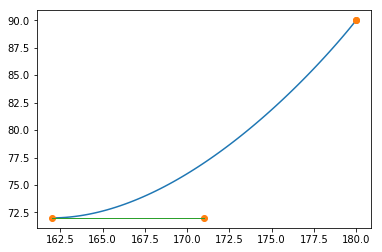

In [52]:
# == plot the line==
controls_np = np.array([start_np, control1_np, control2_np, end_np])
#  curve drawing 
plt.plot(points_np[:, 0], points_np[:, 1], '-')
# showing of control points
plt.plot(controls_np[:,0], controls_np[:,1], 'o')
#  control line drawing 
plt.plot([start_np[0], control1_np[0]], [start_np[1], control1_np[1]], '-', lw=1)
plt.plot([control2_np[0], end_np[0]], [control2_np[1], end_np[1]], '-', lw=1)

plt.show()